In [2]:
import pandas
from sklearn.preprocessing import LabelEncoder

dataset = pandas.read_csv('agaricus-lepiota.data')

data = dataset.values
labels = dataset.columns

label_encoder = LabelEncoder()
for i in range(len(labels)):
    data[:, i] = label_encoder.fit_transform(data[:, i])

data = data.astype(int)
data

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]])

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = range(2, 5)
seeds = range(5)
results = []

clusters_calulated = 0

for seed in seeds:
    for cluster in clusters:
        kmeans = KMeans(n_clusters=cluster, random_state=seed).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        results.append([cluster, seed, score])
        
        clusters_calulated += 1
        print("Clusters calculated", clusters_calulated, end="\r")


pandas.DataFrame(results, columns=['Clusters', 'Seed', 'Silhouette Score'])

KeyboardInterrupt: 

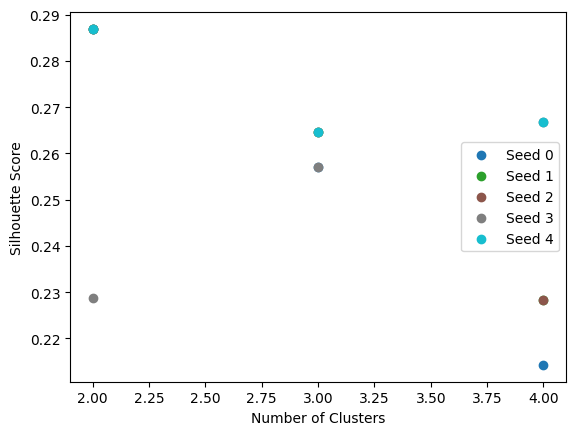

In [78]:
# Plot the data points where the x-axis is the number of clusters and the y-axis is the silhouette score

import matplotlib.pyplot as plt

colormap = plt.get_cmap('tab10', len(seeds))

for seed in seeds:
    seed_results = [result for result in results if result[1] == seed]
    seed_df = pandas.DataFrame(seed_results, columns=['Clusters', 'Seed', 'Silhouette Score'])
    plt.scatter(seed_df['Clusters'], seed_df['Silhouette Score'], label=f'Seed {seed}', color=colormap(seed))

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()